# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

#### Biblioteca de importação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#### Leitura do arquivo CSV

In [2]:
df = pd.read_csv('df_dummy.csv')
df.head(2)

,Unnamed: 0,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,...,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow
0,0,1,1,58.832877,3.106849,1,0,0,0,False,...,0,1,0,0,0,1,1,0,0,0
1,1,0,1,52.356164,8.358904,1,0,1,1,False,...,0,0,0,0,0,1,0,0,1,0


#### Verificação dos dados

conferindo se todos os dados estão em tipo numérico.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   idade                                   16650 non-null  float64
 4   tempo_emprego                           16650 non-null  float64
 5   possui_celular                          16650 non-null  int64  
 6   possui_fone_comercial                   16650 non-null  int64  
 7   possui_fone                             16650 non-null  int64  
 8   possui_email                            16650 non-null  int64  
 9   mau                                     16650 non-null  bool   
 10  tipo_renda_Pensioner                    16650 non-null  in

In [4]:
df[['mau']]

,mau
0,False
1,False
2,False
3,False
4,False
...,...
16645,True
16646,True
16647,True
16648,True


#### Alterando o tipo do dado

Utilizando o método astype para alterar o tipo dos dados para inteiros.

In [5]:
df[['mau']] = df[['mau']].astype(int)

In [6]:
df[['idade']] = df[['idade']].astype(int)

In [7]:
df[['tempo_emprego']] = df[['tempo_emprego']].astype(int)

In [8]:
df.dtypes

Unnamed: 0                                int64
posse_de_veiculo                          int64
posse_de_imovel                           int64
idade                                     int32
tempo_emprego                             int32
possui_celular                            int64
possui_fone_comercial                     int64
possui_fone                               int64
possui_email                              int64
mau                                       int32
tipo_renda_Pensioner                      int64
tipo_renda_State servant                  int64
tipo_renda_Student                        int64
tipo_renda_Working                        int64
educacao_Higher education                 int64
educacao_Incomplete higher                int64
educacao_Lower secondary                  int64
educacao_Secondary / secondary special    int64
estado_civil_Married                      int64
estado_civil_Separated                    int64
estado_civil_Single / not married       

#### Separando as variáveis explicaticas da target

Atribuindo x a variável target 'mau', e as variáveis explicativas no y.

In [9]:
y = df[['mau']]
X = df.drop('mau', axis=1)

#### Separando treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### Definindo objeto da árvore de decisão para treino

In [11]:
clf_train = DecisionTreeClassifier(random_state=100)

#### Treinando a base de treino

In [12]:
clf_train = clf_train.fit(X_train,y_train)

#### Plotagem da árvore de treino

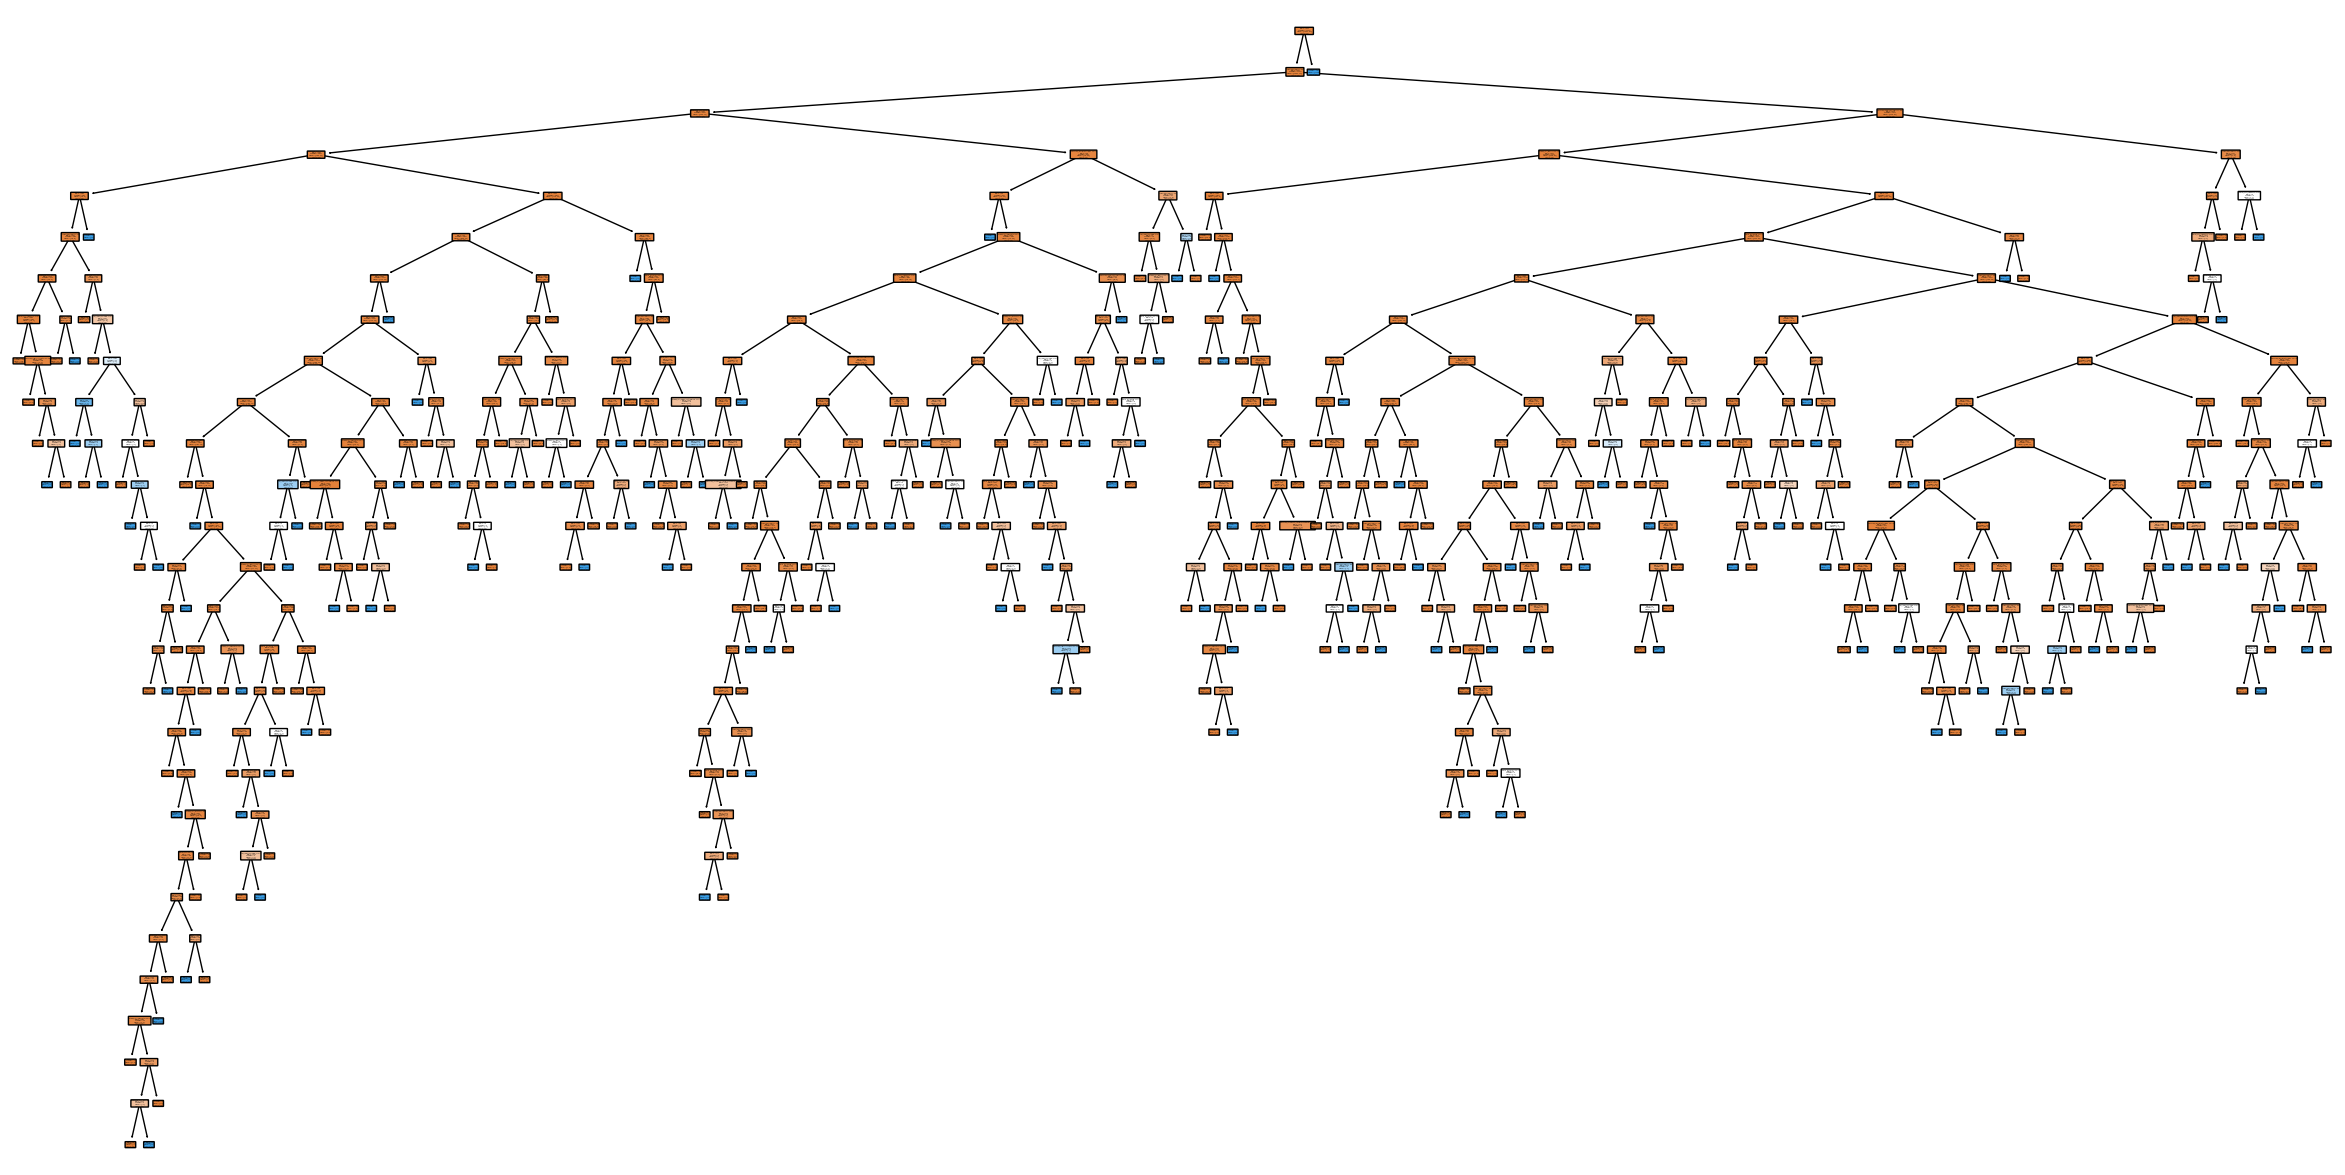

In [13]:
plt.figure(figsize=[30,15])
plot_tree(clf_train,
         filled=True,
         rounded=True,
         class_names=True,
         feature_names=X_train.columns);

#### Visualização da matriz de confusão para a base de treino

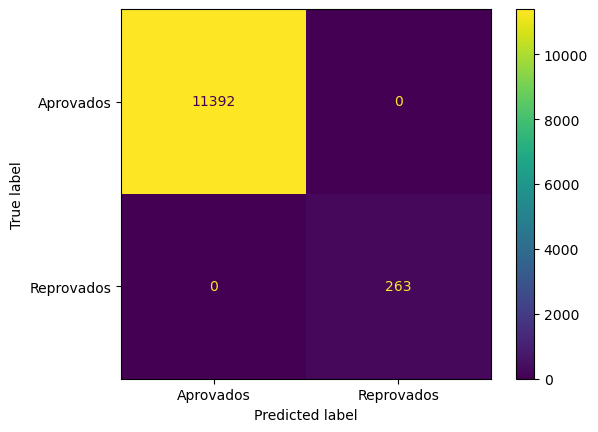

In [14]:
ConfusionMatrixDisplay.from_estimator(clf_train, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

#### Verificando a acurácia da base de treino

In [15]:
predict_train = clf_train.predict(X_train)

In [16]:
accuracy_score(y_train, predict_train)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#### Classificação da base de teste de acordo com a árvore de treino

In [17]:
clf_test = clf_train.fit(X_test,y_test)

#### Matriz de confusão de teste

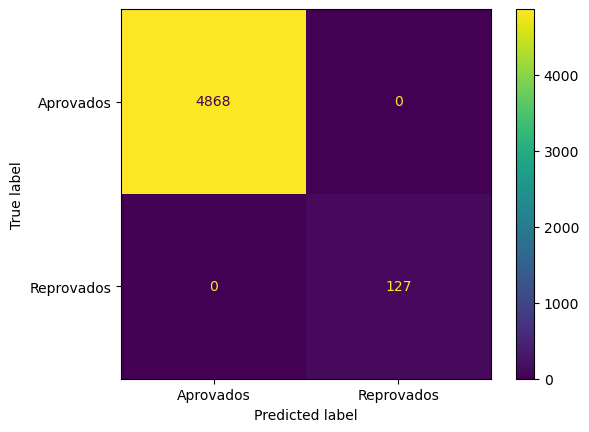

In [18]:
ConfusionMatrixDisplay.from_estimator(clf_test, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

#### Verificando a acurácia da base de teste

In [19]:
predict_test = clf_test.predict(X_test)

In [20]:
accuracy_score(y_test, predict_test)

1.0

# Pre Pruning

Criando nova árvore de decisão limitando o máximo da profundidade em 10, e o mínimo das observações por folha em 5.

In [52]:
clf_pre = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

## Classificação base de treino

clf_pre_train = clf_pre.fit(X_train,y_train)

#### Visualização da nova classificação da base de treino

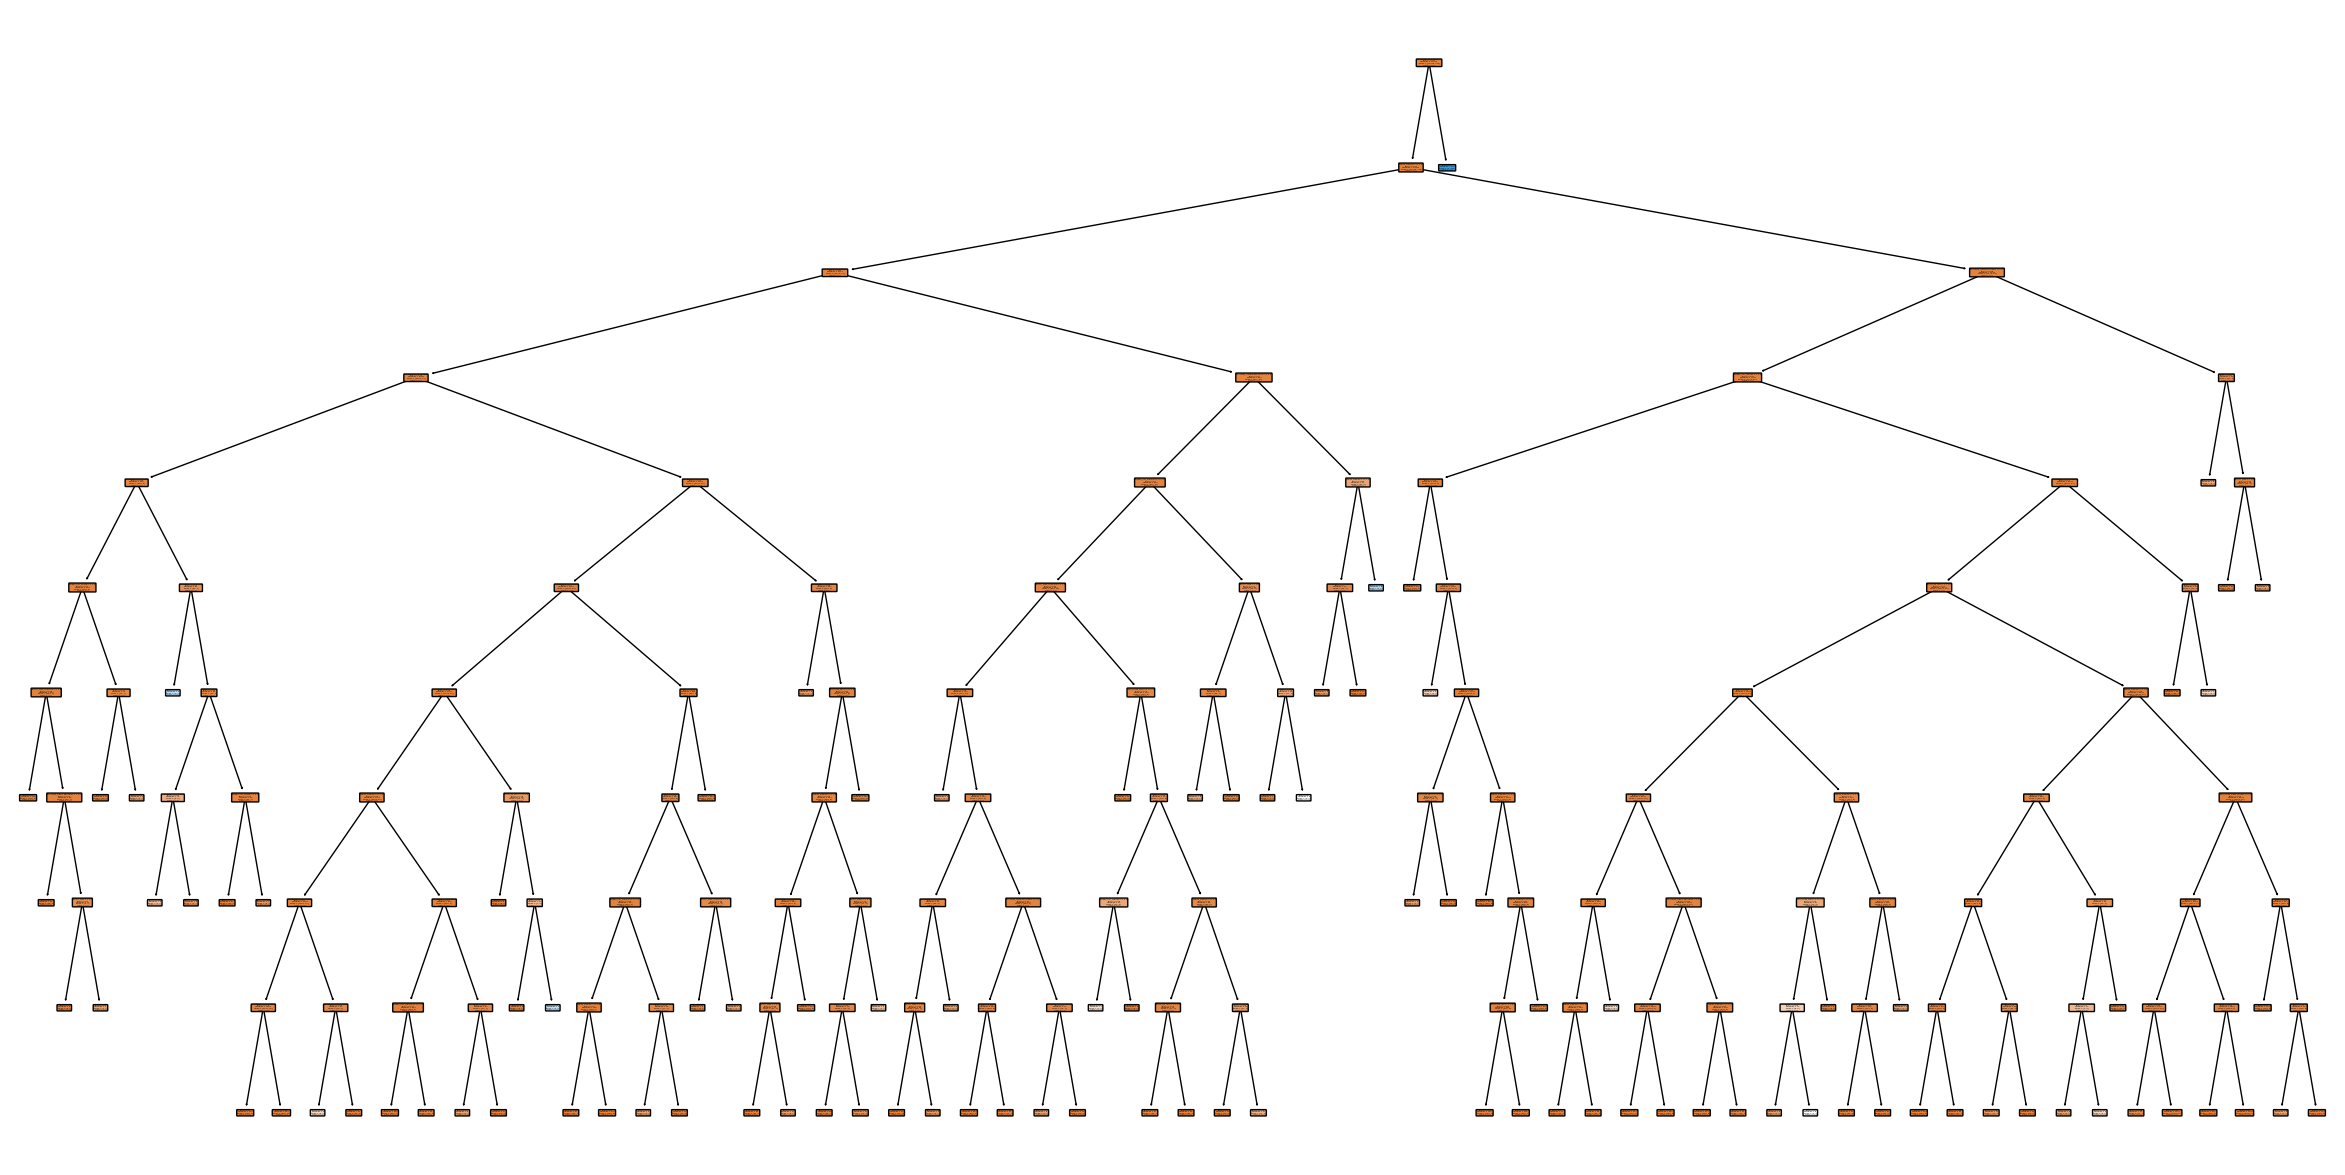

In [31]:
plt.figure(figsize=[30,15])
plot_tree(clf_pre_train,
         filled=True,
         rounded=True,
         class_names=True,
         feature_names=X_train.columns);

#### Matriz de confusão para a base de treino

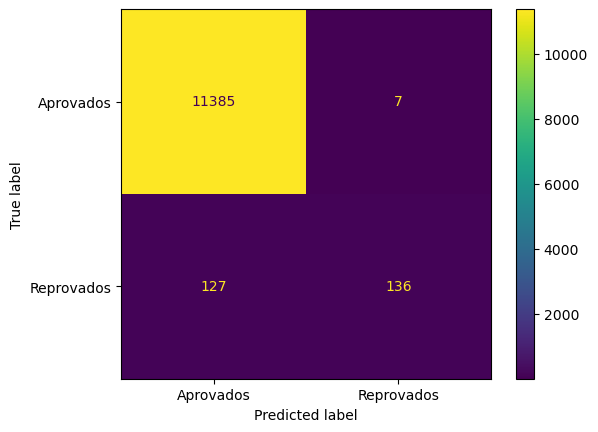

In [32]:
ConfusionMatrixDisplay.from_estimator(clf_pre_train, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

#### Proporção de classificados como REPROVADOS nos preditos

In [34]:
X_train.shape

(11655, 21)

In [62]:
print(f'A proporção de reprovados na predição é de: {round((136/11655)*100,2)}%')

A proporção de reprovados na predição é de: 1.17%


#### Acurácia de todos os preditos como APROVADOS

Cálculo da acurácia, os acertos divido pelo total

In [70]:
11385/11655

0.9768339768339769

## Classificação para a base de teste

In [54]:
clf_pre_test = clf_pre.fit(X_train,y_train)

#### Visualização da nova classificação da base de teste

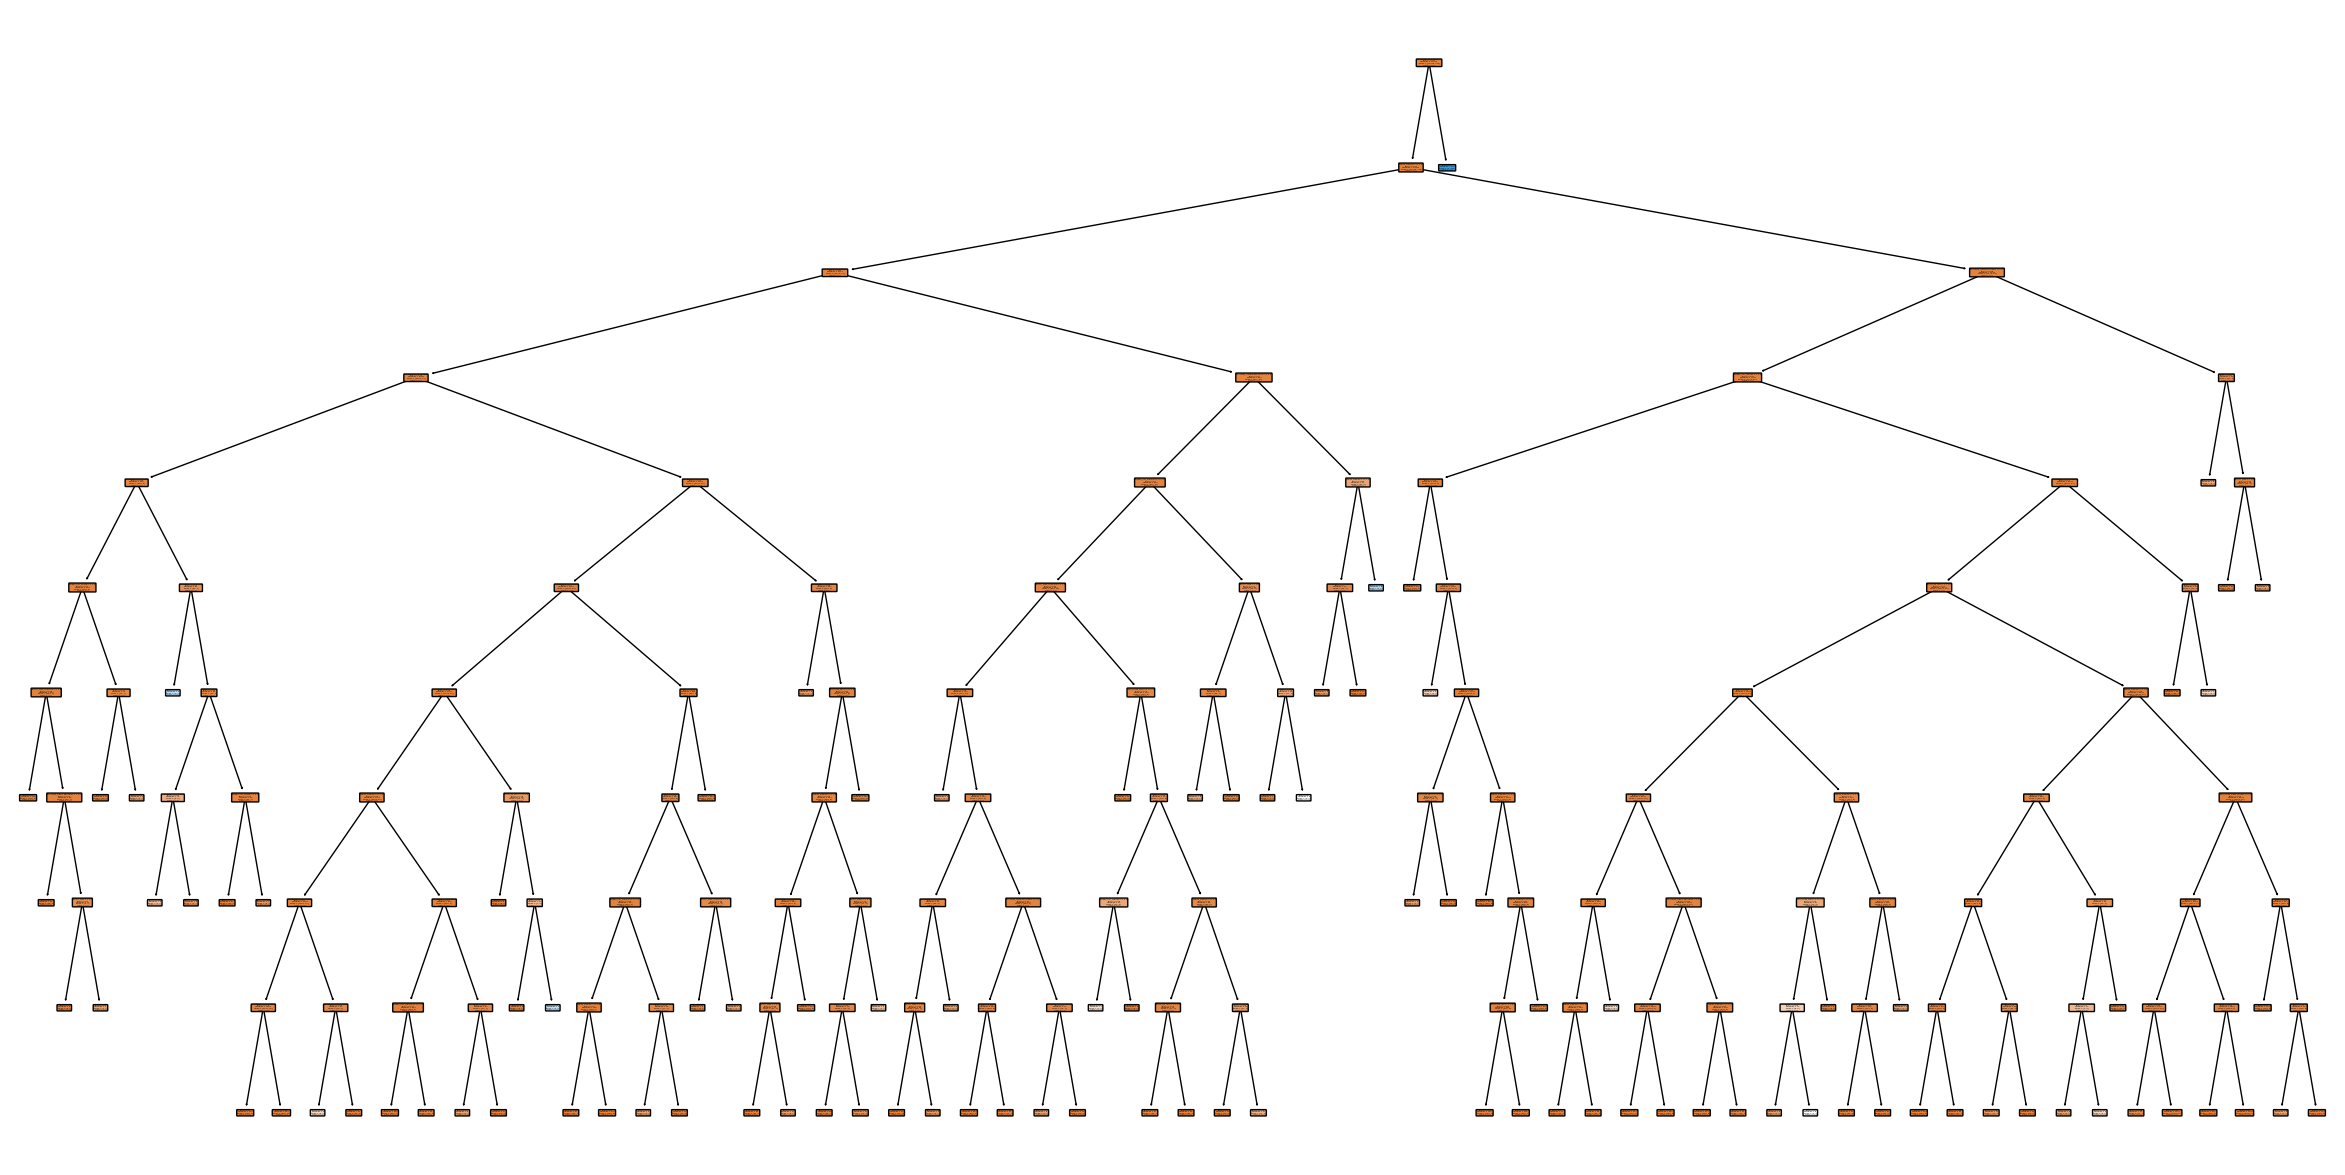

In [56]:
plt.figure(figsize=[30,15])
plot_tree(clf_pre_test,
         filled=True,
         rounded=True,
         class_names=True,
         feature_names=X_test.columns);

#### Matriz de confusão para base de teste

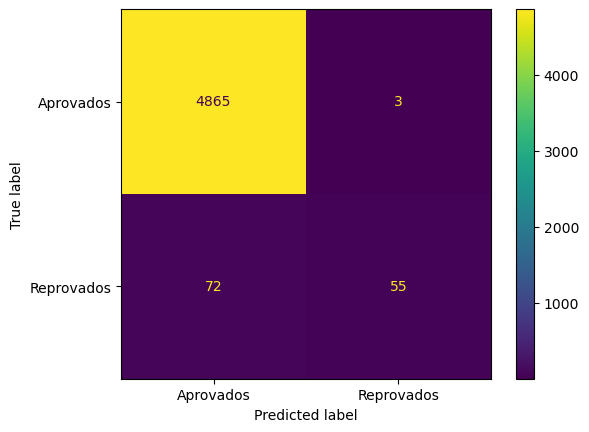

In [57]:
ConfusionMatrixDisplay.from_estimator(clf_pre_test, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

#### Proporção de classificados como REPROVADOS nos preditos

In [58]:
X_test.shape

(4995, 21)

In [64]:
print(f'A proporção de reprovados na predição é de: {round((55/4995)*100,2)}%')

A proporção de reprovados na predição é de: 1.1%


#### Acurácia de todos os preditos como APROVADOS

Cálculo da acurácia os acertos divido pelo total

In [69]:
4865/4995

0.973973973973974